<a href="https://colab.research.google.com/github/nrysam/UCL22_23/blob/GK-Code/UEFA_Champions_League_2022_23_Best_Goalkeeper_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello Everyone!

In this section, i will analyze who is the best Goalkeeper (GK) from UEFA Champions League (UCL) Season 22/23.

# **Overview**

This project focuses on analyzing the performance of goalkeepers in the UEFA Champions League (UCL) 2022/2023 season. The goal is to identify the best goalkeeper based on a comprehensive set of metrics, providing insights into their impact on the pitch.

# **Key Steps and Analysis**

1**. Data Loading and Exploration**

The project begins by loading data from various CSV files containing information on advanced goalkeeping, defensive actions, passing, and possession. Each dataset is carefully explored to understand its structure and contents. Data cleaning steps include handling column names, checking for duplicates, and ensuring consistent data types.

**2. Feature Scaling and Clustering**

Numeric features are standardized using the StandardScaler to bring them to a common scale. K-Means clustering is then employed to group goalkeepers based on their performance metrics. The optimal number of clusters is determined using the Elbow method.

**3. Impact Factor Calculation**

A weighted approach is introduced to calculate an "Impact Factor" for each goalkeeper. The weights assigned to different metrics reflect their significance in determining overall performance. The Impact Factor is computed by combining the standardized values of these weighted features.

**4. Visualization and Analysis**

Various visualizations are incorporated to enhance understanding and interpretation of the data. These include pair plots, distribution plots, bar plots for top goalkeepers, and box plots for key metrics. These visualizations provide a comprehensive view of the dataset and highlight patterns and trends.

**5. Results and Conclusion**

The project concludes by presenting the top-performing goalkeeper based on the calculated Impact Factor. A bar plot showcases the top goalkeepers, and box plots provide insights into the distribution of key metrics. The narrative text aims to provide clarity on the analysis process and key findings.

# **How to Use**
To replicate and extend the analysis, follow the steps outlined in the Jupyter Notebook provided. Ensure that the required libraries are installed and update file paths if necessary.

# **Next Steps**

Future iterations of this project could involve expanding the analysis to other positions, incorporating more advanced machine learning techniques, or exploring additional datasets to gain a more comprehensive understanding of player performance in the UEFA Champions League.

In [53]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [54]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_gk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')

In [55]:
#Check the UCL Advanced Goalkeeping data to see if there is some abnormalities

df_agk.head(30)

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [56]:
#Now there is a row that is abnormal. We need to remove it

df_agk = df_agk[df_agk['Age'].apply(lambda x: str(x).isdigit())]
df_agk

,Player,Nationality,Position,Club,Age,Born,90s,GA,PKA,FK,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Antonio Adán,ESP,GK,Sporting CP,35,1987,4.2,5,1,0,...,30.5,35,51.4,37,82,9,11,3,0.71,9.2
1,Alisson,BRA,GK,Liverpool,29,1992,8,12,1,0,...,26.5,37,24.3,31.6,56,7,12.5,10,1.25,17.4
2,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,9,8,0,0,...,30,46,56.5,44.2,88,6,6.8,10,1.11,17.3
3,Janis Blaswich,GER,GK,RB Leipzig,31,1991,5.9,11,2,0,...,25.6,35,14.3,26.8,83,5,6,4,0.68,14.5
4,Yassine Bounou,MAR,GK,Sevilla,31,1991,4,12,0,0,...,28.5,43,53.5,43.6,53,6,11.3,4,1,11.4
5,Josh Cohen,USA,GK,Maccabi Haifa,29,1992,6,21,0,1,...,32.5,39,43.6,34.6,82,4,4.9,8,1.33,17.2
6,Diogo Costa,POR,GK,Porto,22,1999,8,8,1,0,...,36.1,48,58.3,46.7,117,9,7.7,8,1,13.6
7,Thibaut Courtois,BEL,GK,Real Madrid,30,1992,10,11,0,1,...,30,54,44.4,42.9,134,9,6.7,5,0.5,11.5
8,Marko Dmitrović,SRB,GK,Sevilla,30,1992,2,0,0,0,...,32.7,9,66.7,48.6,20,2,10,0,0,7.8
9,Gianluigi Donnarumma,ITA,GK,Paris S-G,23,1999,8,10,1,0,...,25.1,46,19.6,23.7,99,2,2,8,1,13.3


In [57]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [58]:
#Check All the column in UCL Defensive Actions Data

print(df_defense.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'No. of players tackled', 'Tackles won', 'Tackles (Def 3rd)',
       'Tackles (Mid 3rd)', 'Tackles (Att 3rd)', 'No. of dribblers tackled',
       'Dribbles challenged (total)', '% of dribblers successfully tackled',
       'challenges lost', 'Blocks', 'Shots blocked', 'Passes blocked',
       'Interceptions', 'Tackles + internceptions', 'Clearances', 'Errors'],
      dtype='object')


In [59]:
#Check All the column in UCL Possession Data

print(df_possession.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Touches', 'Touches (Def Pen)', 'Touches (Def 3rd)',
       'Touches (Mid 3rd)', 'Touches (Att 3rd)', 'Touches (Att Pen)',
       'Touches (LiveBall)', 'Take-ons attempted', 'Take-ons completed',
       'successful takeon (%)', 'Times tackled during takeon',
       'Times tackled during takeon (%)', 'Carries', 'Total carrying distance',
       'Progressive carrying distance', 'Progressive carries',
       'Carries into final third', 'Carries into penalty area', 'Miscontrols',
       'Dispossessed', 'Passes received', 'Progressive passes received'],
      dtype='object')


In [60]:
#Check to see if there is any duplicate player in the data

print(df_agk['Player'].duplicated().any())
print(df_gk['Player'].duplicated().any())

False
False


In [61]:
#Check to see the datatypes in the data

df_agk.dtypes

Player         object
Nationality    object
Position       object
Club           object
Age            object
Born           object
90s            object
GA             object
PKA            object
FK             object
CK             object
OG             object
PSxG           object
PSxG/SoT       object
PSxG+/-        object
/90            object
Cmp            object
Att            object
Cmp%           object
Att.1          object
Thr            object
Launch%        object
AvgLen         object
Att.2          object
Launch%.1      object
AvgLen.1       object
Opp            object
Stp            object
Stp%           object
#OPA           object
#OPA/90        object
AvgDist        object
dtype: object

In [62]:
#We need some of the data above to be float.

df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']] = df_agk[['PSxG+/-','Stp','Stp%','#OPA/90','AvgDist']].astype(float)
df_agk.dtypes

Player          object
Nationality     object
Position        object
Club            object
Age             object
Born            object
90s             object
GA              object
PKA             object
FK              object
CK              object
OG              object
PSxG            object
PSxG/SoT        object
PSxG+/-        float64
/90             object
Cmp             object
Att             object
Cmp%            object
Att.1           object
Thr             object
Launch%         object
AvgLen          object
Att.2           object
Launch%.1       object
AvgLen.1        object
Opp             object
Stp            float64
Stp%           float64
#OPA            object
#OPA/90        float64
AvgDist        float64
dtype: object

In [63]:
#Confirming UCL Goalkeeping Data columns

df_gk.dtypes

Player          object
Nationality     object
Position        object
Club            object
Age              int64
Born             int64
MP               int64
Starts           int64
Min             object
90s            float64
GA               int64
GA90           float64
SoTA             int64
Saves            int64
Save%          float64
W                int64
D                int64
L                int64
CS               int64
CS%            float64
PKatt            int64
PKA              int64
PKsv             int64
PKm              int64
Save%.1        float64
dtype: object

In [64]:
# Filtering data for goalkeepers in defensive actions, passing, and possession datasets

gk_def= df_defense[df_defense['Position']=='GK']
gk_pass = df_passing[df_passing['Position']=='GK']
gk_poss = df_possession[df_possession['Position']=='GK']

In [65]:
# Selecting specific columns for each goalkeeper-related DataFrame

gk_def1 = gk_def[['Player','Position','Club','Clearances', 'Errors']]
gk_def1

,Player,Position,Club,Clearances,Errors
6,Antonio Adán,GK,Sporting CP,4,1
19,Alisson,GK,Liverpool,1,1
33,Kepa Arrizabalaga,GK,Chelsea,2,0
76,Janis Blaswich,GK,RB Leipzig,2,0
85,Yassine Bounou,GK,Sevilla,3,2
130,Josh Cohen,GK,Maccabi Haifa,2,0
140,Diogo Costa,GK,Porto,3,0
142,Thibaut Courtois,GK,Real Madrid,3,1
176,Marko Dmitrović,GK,Sevilla,0,0
179,Gianluigi Donnarumma,GK,Paris S-G,7,1


In [66]:
gk_pass1 = gk_pass[['Player','Position','Club','Total Passes completion %','Passes completed (long) %', 'Key Passes', 'Passes into Final third']]
gk_pass1

,Player,Position,Club,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third
6,Antonio Adán,GK,Sporting CP,69.9,35.1,0,0
19,Alisson,GK,Liverpool,88.3,71.1,0,6
33,Kepa Arrizabalaga,GK,Chelsea,72.9,47.2,0,1
76,Janis Blaswich,GK,RB Leipzig,83.3,43.1,0,4
85,Yassine Bounou,GK,Sevilla,79.8,55.2,0,1
130,Josh Cohen,GK,Maccabi Haifa,73.8,46.2,0,3
140,Diogo Costa,GK,Porto,72.6,52.8,1,9
142,Thibaut Courtois,GK,Real Madrid,79.2,49.0,0,2
176,Marko Dmitrović,GK,Sevilla,67.1,31.4,0,1
179,Gianluigi Donnarumma,GK,Paris S-G,82.8,40.0,0,0


In [67]:
gk_poss1 = gk_poss[['Player','Position','Club','Touches','Miscontrols', 'Dispossessed', 'Passes received']]
gk_poss1

,Player,Position,Club,Touches,Miscontrols,Dispossessed,Passes received
6,Antonio Adán,GK,Sporting CP,235,0,0,119
19,Alisson,GK,Liverpool,284,0,0,178
33,Kepa Arrizabalaga,GK,Chelsea,288,0,0,152
76,Janis Blaswich,GK,RB Leipzig,280,0,0,191
85,Yassine Bounou,GK,Sevilla,224,1,0,123
130,Josh Cohen,GK,Maccabi Haifa,164,0,0,56
140,Diogo Costa,GK,Porto,400,0,0,246
142,Thibaut Courtois,GK,Real Madrid,400,1,0,234
176,Marko Dmitrović,GK,Sevilla,76,0,0,50
179,Gianluigi Donnarumma,GK,Paris S-G,261,0,0,131


In [68]:
# Merge all datasets based on player's name, club, and position
df_merge = [df_agk, df_gk, gk_def1, gk_pass1, gk_poss1]
data = df_merge[0]
for df in df_merge[1:]:
    data = pd.merge(data, df, on=['Player', 'Club', 'Position'], how='outer')

print(data.columns)

Index(['Player', 'Nationality_x', 'Position', 'Club', 'Age_x', 'Born_x',
       '90s_x', 'GA_x', 'PKA_x', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT',
       'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%',
       'AvgLen', 'Att.2', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%',
       '#OPA', '#OPA/90', 'AvgDist', 'Nationality_y', 'Age_y', 'Born_y', 'MP',
       'Starts', 'Min', '90s_y', 'GA_y', 'GA90', 'SoTA', 'Saves', 'Save%', 'W',
       'D', 'L', 'CS', 'CS%', 'PKatt', 'PKA_y', 'PKsv', 'PKm', 'Save%.1',
       'Clearances', 'Errors', 'Total Passes completion %',
       'Passes completed (long) %', 'Key Passes', 'Passes into Final third',
       'Touches', 'Miscontrols', 'Dispossessed', 'Passes received'],
      dtype='object')


In [69]:
# Renaming columns for better understanding

data = data.rename(columns = {'Stp':'CrossStp','Stp%':'CrossStp%'})

In [70]:
print(data.columns)

Index(['Player', 'Nationality_x', 'Position', 'Club', 'Age_x', 'Born_x',
       '90s_x', 'GA_x', 'PKA_x', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT',
       'PSxG+/-', '/90', 'Cmp', 'Att', 'Cmp%', 'Att.1', 'Thr', 'Launch%',
       'AvgLen', 'Att.2', 'Launch%.1', 'AvgLen.1', 'Opp', 'CrossStp',
       'CrossStp%', '#OPA', '#OPA/90', 'AvgDist', 'Nationality_y', 'Age_y',
       'Born_y', 'MP', 'Starts', 'Min', '90s_y', 'GA_y', 'GA90', 'SoTA',
       'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%', 'PKatt', 'PKA_y', 'PKsv',
       'PKm', 'Save%.1', 'Clearances', 'Errors', 'Total Passes completion %',
       'Passes completed (long) %', 'Key Passes', 'Passes into Final third',
       'Touches', 'Miscontrols', 'Dispossessed', 'Passes received'],
      dtype='object')


<ipython-input-71-5e2b33f687a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


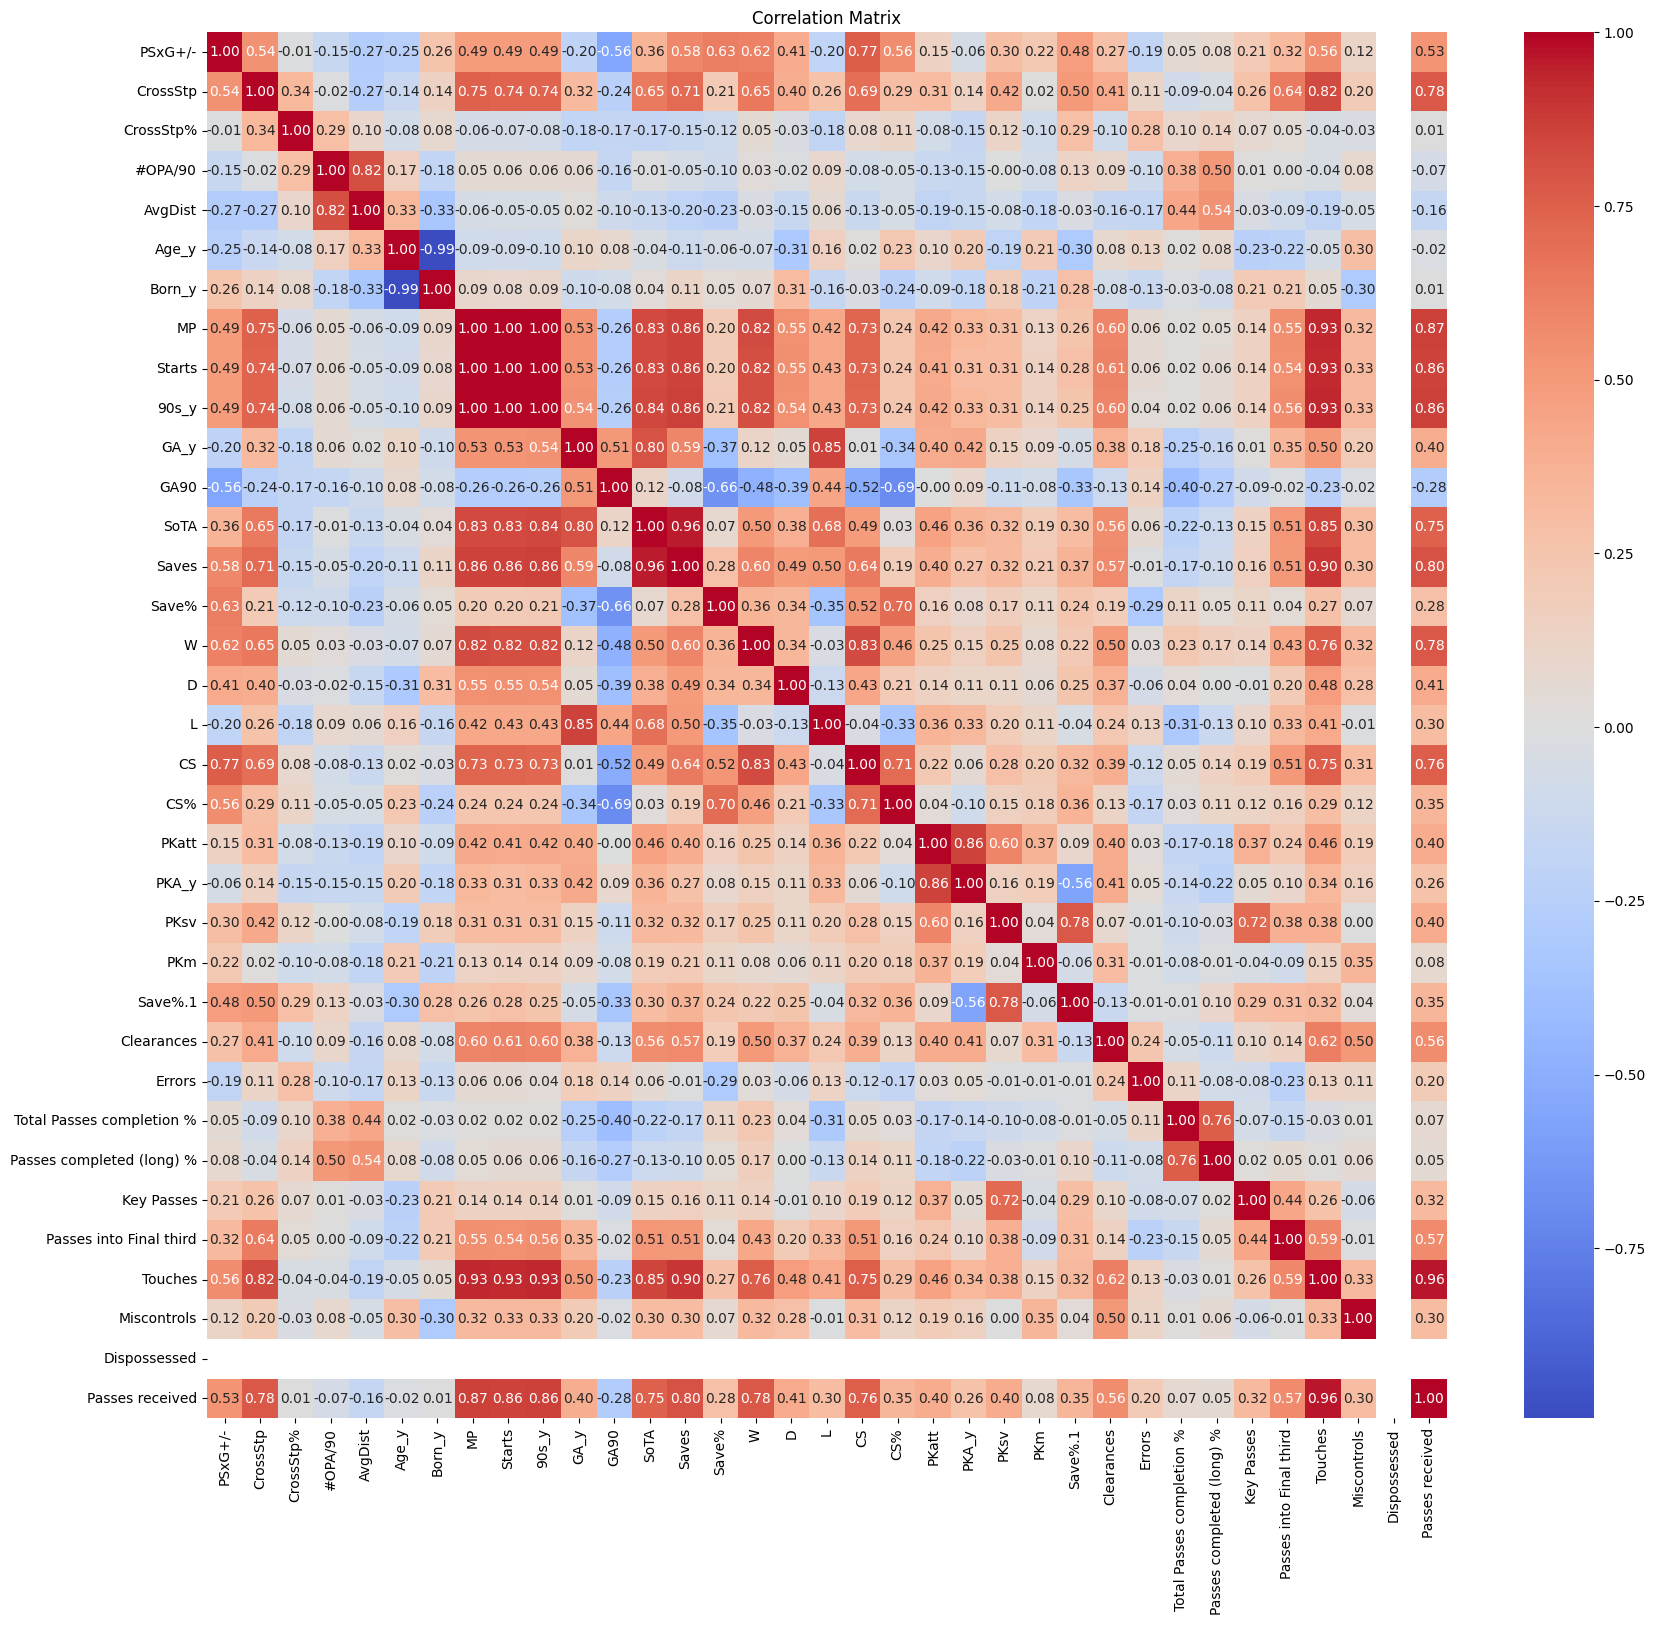

In [71]:
#visualization for correlation
def plot_correlation_matrix(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Usage
plot_correlation_matrix(data)

In [72]:
# Selecting specific columns for analysis

data2 = data[['Player','Position','Club','Saves', 'Save%', 'CS', 'CS%', 'PKsv', 'PSxG+/-', '#OPA/90', 'AvgDist', 'CrossStp', 'CrossStp%', 'Clearances', 'Errors', 'Total Passes completion %', 'Passes completed (long) %', 'Key Passes', 'Passes into Final third', 'Touches', 'Miscontrols', 'Dispossessed', 'Passes received']]
data2

,Player,Position,Club,Saves,Save%,CS,CS%,PKsv,PSxG+/-,#OPA/90,...,Clearances,Errors,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third,Touches,Miscontrols,Dispossessed,Passes received
0,Antonio Adán,GK,Sporting CP,16,81.0,2,40.0,0,1.1,0.71,...,4,1,69.9,35.1,0,0,235,0,0,119
1,Alisson,GK,Liverpool,15,60.7,3,37.5,1,0.6,1.25,...,1,1,88.3,71.1,0,6,284,0,0,178
2,Kepa Arrizabalaga,GK,Chelsea,27,77.1,3,33.3,0,1.6,1.11,...,2,0,72.9,47.2,0,1,288,0,0,152
3,Janis Blaswich,GK,RB Leipzig,20,71.0,2,40.0,0,-0.8,0.68,...,2,0,83.3,43.1,0,4,280,0,0,191
4,Yassine Bounou,GK,Sevilla,14,53.8,0,0.0,0,-2.8,1.00,...,3,2,79.8,55.2,0,1,224,1,0,123
5,Josh Cohen,GK,Maccabi Haifa,22,50.0,1,16.7,0,-2.3,1.33,...,2,0,73.8,46.2,0,3,164,0,0,56
6,Diogo Costa,GK,Porto,28,81.6,4,50.0,3,3.7,1.00,...,3,0,72.6,52.8,1,9,400,0,0,246
7,Thibaut Courtois,GK,Real Madrid,41,79.2,5,50.0,1,5.5,0.50,...,3,1,79.2,49.0,0,2,400,1,0,234
8,Marko Dmitrović,GK,Sevilla,4,100.0,2,100.0,0,0.9,0.00,...,0,0,67.1,31.4,0,1,76,0,0,50
9,Gianluigi Donnarumma,GK,Paris S-G,26,74.3,0,0.0,0,1.1,1.00,...,7,1,82.8,40.0,0,0,261,0,0,131


In [73]:
# Checking data types

data2.dtypes

Player                        object
Position                      object
Club                          object
Saves                          int64
Save%                        float64
CS                             int64
CS%                          float64
PKsv                           int64
PSxG+/-                      float64
#OPA/90                      float64
AvgDist                      float64
CrossStp                     float64
CrossStp%                    float64
Clearances                     int64
Errors                         int64
Total Passes completion %    float64
Passes completed (long) %    float64
Key Passes                     int64
Passes into Final third        int64
Touches                        int64
Miscontrols                    int64
Dispossessed                   int64
Passes received                int64
dtype: object

In [74]:
# Scaling numeric columns using StandardScaler
from sklearn.preprocessing import StandardScaler

numeric_columns = data2.select_dtypes(include='number')
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(numeric_columns)
data2[numeric_columns.columns] = scaled_data1
scaled_df1 = pd.DataFrame(scaled_data1, columns=numeric_columns.columns)
scaled_df1.head(10)

<ipython-input-74-a77edfbd7ae2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[numeric_columns.columns] = scaled_data1


,Saves,Save%,CS,CS%,PKsv,PSxG+/-,#OPA/90,AvgDist,CrossStp,CrossStp%,Clearances,Errors,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third,Touches,Miscontrols,Dispossessed,Passes received
0,-0.038076,0.728979,0.224592,0.469575,-0.441726,0.204652,-0.386955,-1.207120,1.824595,1.266576,1.206650,1.105422,-0.751749,-1.290947,-0.144338,-0.754040,0.382962,-0.441726,0.0,0.302988
1,-0.136273,-0.713750,0.774841,0.375460,1.361989,-0.038745,0.491161,0.635868,1.164779,1.630507,-0.420667,1.105422,1.061944,1.628204,-0.144338,1.765138,0.805911,-0.441726,0.0,1.178051
2,1.042086,0.451805,0.774841,0.217347,-0.441726,0.448048,0.263501,0.613393,0.834870,0.247572,0.121772,-0.587255,-0.456038,-0.309787,-0.144338,-0.334177,0.840438,-0.441726,0.0,0.792430
3,0.354710,0.018275,0.224592,0.469575,-0.441726,-0.720255,-0.435739,-0.015920,0.504962,0.053475,0.121772,-0.587255,0.569093,-0.642246,-0.144338,0.925412,0.771385,-0.441726,0.0,1.370861
4,-0.234469,-1.204136,-0.875907,-1.036261,-0.441726,-1.693840,0.084626,-0.712660,0.834870,1.339362,0.664211,2.798099,0.224097,0.338913,-0.144338,-0.334177,0.288014,2.263846,0.0,0.362314
5,0.551103,-1.474204,-0.325658,-0.407574,-0.441726,-1.450444,0.621252,0.590917,0.175053,-0.213407,0.121772,-0.587255,-0.367325,-0.390875,-0.144338,0.505549,-0.229883,-0.441726,0.0,-0.631401
6,1.140283,0.771622,1.325090,0.846034,4.969419,1.470313,0.084626,-0.218199,1.824595,0.465930,0.664211,-0.587255,-0.485610,0.144303,6.928203,3.024727,1.807179,-0.441726,0.0,2.186598
7,2.416839,0.601053,1.875339,0.846034,1.361989,2.346540,-0.728445,-0.690184,1.824595,0.223310,0.664211,1.105422,0.164954,-0.163830,-0.144338,0.085686,1.807179,2.263846,0.0,2.008619
8,-1.216435,2.079317,0.224592,2.728328,-0.441726,0.107293,-1.541515,-1.521776,-0.484763,1.023956,-0.963106,-0.587255,-1.027746,-1.590970,-0.144338,-0.334177,-0.989465,-0.441726,0.0,-0.720391
9,0.943890,0.252808,-0.875907,-1.036261,-0.441726,0.204652,0.084626,-0.285626,-0.484763,-0.917005,2.833968,1.105422,0.519807,-0.893618,-0.144338,-0.754040,0.607384,-0.441726,0.0,0.480967


In [75]:
column_names = scaled_df1.columns.tolist()

print(column_names)

['Saves', 'Save%', 'CS', 'CS%', 'PKsv', 'PSxG+/-', '#OPA/90', 'AvgDist', 'CrossStp', 'CrossStp%', 'Clearances', 'Errors', 'Total Passes completion %', 'Passes completed (long) %', 'Key Passes', 'Passes into Final third', 'Touches', 'Miscontrols', 'Dispossessed', 'Passes received']


In [76]:
# Defining weights for impact calculation

weights = {
    'Saves' : 10,
    'Save%' : 15,
    'CS' : 10,
    'CS%' : 10,
    'PKsv' : 3,
    'PSxG+/-' : 15,
    '#OPA/90' : 5,
    'AvgDist' : 5,
    'CrossStp' : 3,
    'CrossStp%' : 3,
    'Clearances' : 3,
    'Errors' : -5,
    'Total Passes completion %' : 5,
    'Passes completed (long) %' : 5,
    'Key Passes' : 3,
    'Passes into Final third' : 3,
    'Touches' : 3,
    'Miscontrols' : -3,
    'Dispossessed' : -3,
    'Passes received' : 3
}

# Calculating impact scores based on weighted features
impact_scores = []
for _, row in scaled_df1.iterrows():
    score = sum(row[column] * weights[column] for column in weights)
    impact_scores.append(score)

# Adding the calculated impact scores to the DataFrame
scaled_df1['Impact_Factor'] = impact_scores

In [77]:
scaled_df1['Impact_Factor']

0       9.110591
1      35.760925
2      44.407858
3      11.081873
4     -78.337579
5     -41.734841
6     134.242728
7      99.683599
8      16.853394
9      -6.355533
10    105.182818
11     18.375351
12      3.740868
13    -92.004975
14   -126.839716
15    -48.372297
16    -13.199067
17    -92.275769
18     45.005238
19    -11.721638
20     11.283518
21     34.996781
22    -31.665176
23    -37.789352
24     53.800705
25    -54.705097
26    -81.240589
27    -34.231472
28     66.441131
29     19.875658
30     83.260050
31           NaN
32    -13.191022
33    175.543621
34     37.249510
35    -47.737366
36    -25.234494
37    -38.955183
38    -62.546546
39     12.475844
40    -37.135534
41    -57.757760
42     73.736595
43    -30.910613
44     10.896401
45    -21.409089
46    -82.581653
47     18.209749
48     -6.610742
Name: Impact_Factor, dtype: float64

In [78]:
#Quick Check

data2.head(11)

,Player,Position,Club,Saves,Save%,CS,CS%,PKsv,PSxG+/-,#OPA/90,...,Clearances,Errors,Total Passes completion %,Passes completed (long) %,Key Passes,Passes into Final third,Touches,Miscontrols,Dispossessed,Passes received
0,Antonio Adán,GK,Sporting CP,-0.038076,0.728979,0.224592,0.469575,-0.441726,0.204652,-0.386955,...,1.206650,1.105422,-0.751749,-1.290947,-0.144338,-0.754040,0.382962,-0.441726,0.0,0.302988
1,Alisson,GK,Liverpool,-0.136273,-0.713750,0.774841,0.375460,1.361989,-0.038745,0.491161,...,-0.420667,1.105422,1.061944,1.628204,-0.144338,1.765138,0.805911,-0.441726,0.0,1.178051
2,Kepa Arrizabalaga,GK,Chelsea,1.042086,0.451805,0.774841,0.217347,-0.441726,0.448048,0.263501,...,0.121772,-0.587255,-0.456038,-0.309787,-0.144338,-0.334177,0.840438,-0.441726,0.0,0.792430
3,Janis Blaswich,GK,RB Leipzig,0.354710,0.018275,0.224592,0.469575,-0.441726,-0.720255,-0.435739,...,0.121772,-0.587255,0.569093,-0.642246,-0.144338,0.925412,0.771385,-0.441726,0.0,1.370861
4,Yassine Bounou,GK,Sevilla,-0.234469,-1.204136,-0.875907,-1.036261,-0.441726,-1.693840,0.084626,...,0.664211,2.798099,0.224097,0.338913,-0.144338,-0.334177,0.288014,2.263846,0.0,0.362314
5,Josh Cohen,GK,Maccabi Haifa,0.551103,-1.474204,-0.325658,-0.407574,-0.441726,-1.450444,0.621252,...,0.121772,-0.587255,-0.367325,-0.390875,-0.144338,0.505549,-0.229883,-0.441726,0.0,-0.631401
6,Diogo Costa,GK,Porto,1.140283,0.771622,1.325090,0.846034,4.969419,1.470313,0.084626,...,0.664211,-0.587255,-0.485610,0.144303,6.928203,3.024727,1.807179,-0.441726,0.0,2.186598
7,Thibaut Courtois,GK,Real Madrid,2.416839,0.601053,1.875339,0.846034,1.361989,2.346540,-0.728445,...,0.664211,1.105422,0.164954,-0.163830,-0.144338,0.085686,1.807179,2.263846,0.0,2.008619
8,Marko Dmitrović,GK,Sevilla,-1.216435,2.079317,0.224592,2.728328,-0.441726,0.107293,-1.541515,...,-0.963106,-0.587255,-1.027746,-1.590970,-0.144338,-0.334177,-0.989465,-0.441726,0.0,-0.720391
9,Gianluigi Donnarumma,GK,Paris S-G,0.943890,0.252808,-0.875907,-1.036261,-0.441726,0.204652,0.084626,...,2.833968,1.105422,0.519807,-0.893618,-0.144338,-0.754040,0.607384,-0.441726,0.0,0.480967


In [79]:
# Selecting specific columns for the final analysis

data3 = data[['Player','Position','Club','Saves', 'Save%', 'CS', 'CS%', 'PKsv', 'PSxG+/-', '#OPA/90', 'AvgDist', 'CrossStp', 'CrossStp%', 'Clearances', 'Errors', 'Total Passes completion %', 'Passes completed (long) %', 'Key Passes', 'Passes into Final third', 'Touches', 'Miscontrols', 'Dispossessed', 'Passes received']]

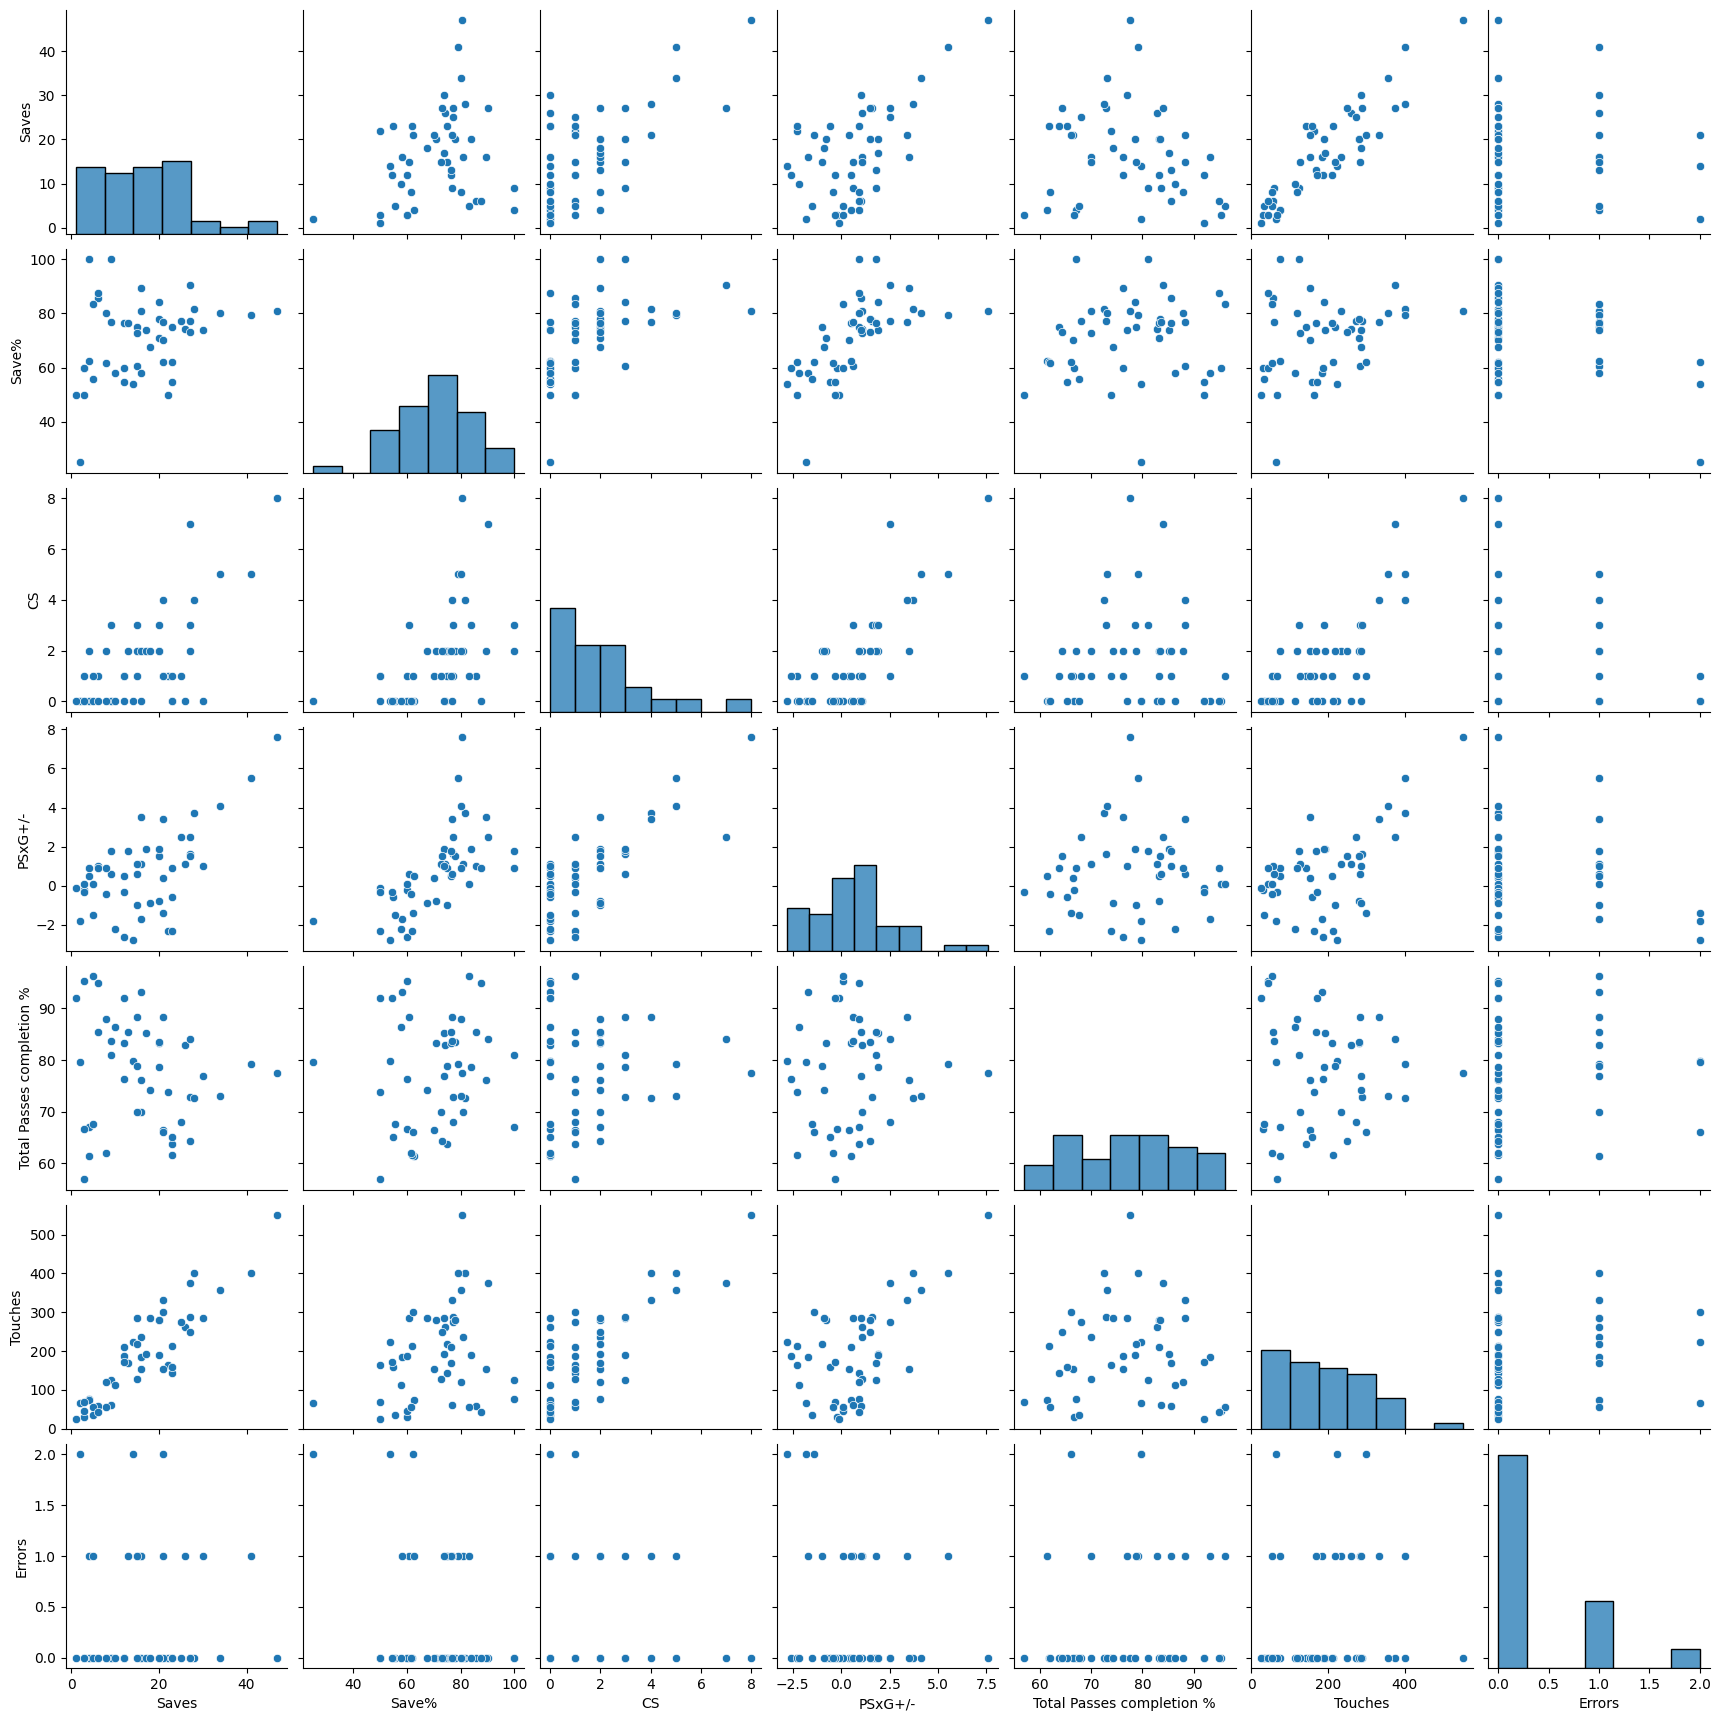

In [81]:
# Select key metrics for pairplot
key_metrics = ['Saves', 'Save%', 'CS', 'PSxG+/-', 'Total Passes completion %', 'Touches', 'Errors']

# Create a pairplot for key metrics
sns.pairplot(data3[key_metrics])
plt.show()

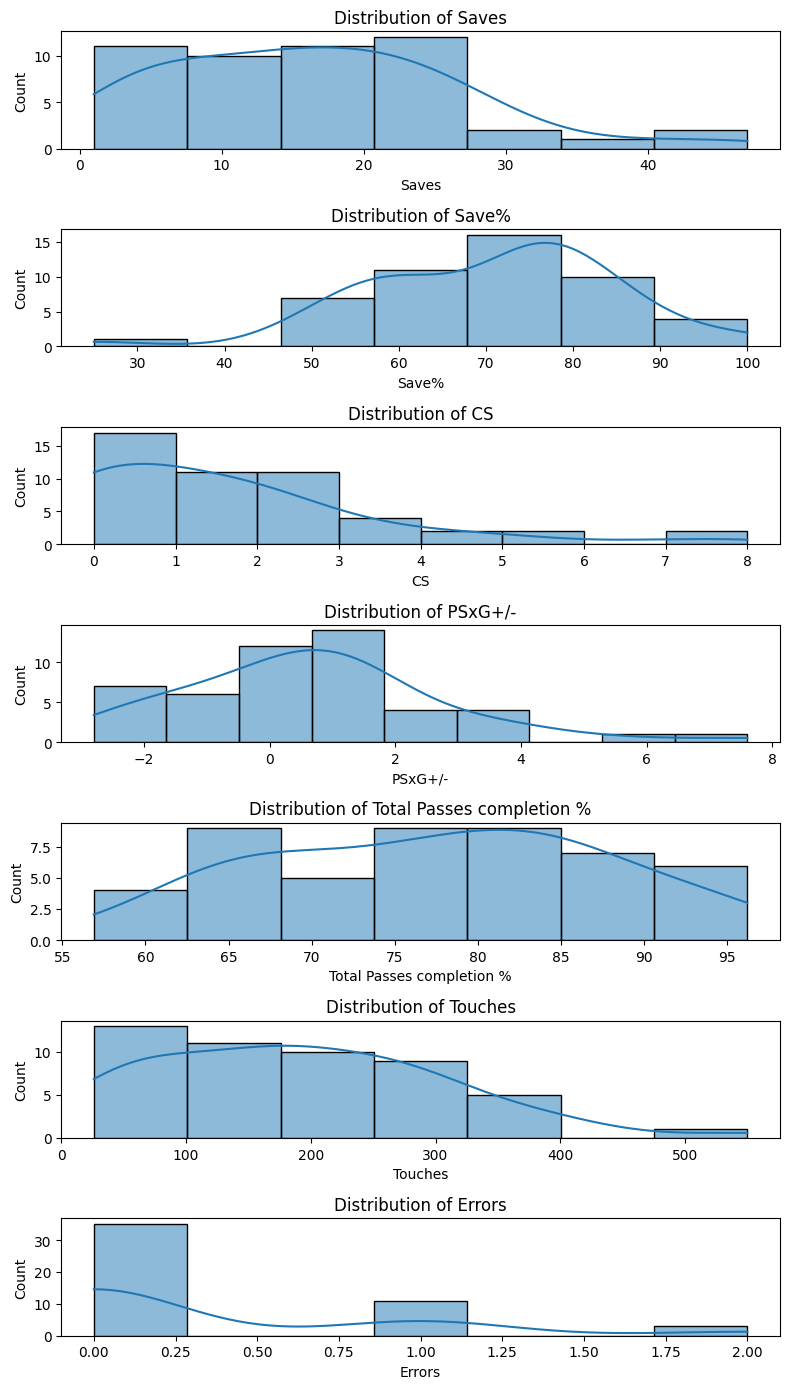

In [82]:
# Create subplots for distribution plots
fig, axes = plt.subplots(nrows=len(key_metrics), ncols=1, figsize=(8, 2 * len(key_metrics)))

# Plot distribution for each key metric
for i, metric in enumerate(key_metrics):
    sns.histplot(data3[metric], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)

plt.tight_layout()
plt.show()

In [84]:
# Adding the calculated Impact Factor to the DataFrame

data3['Score'] = scaled_df1['Impact_Factor']

<ipython-input-84-5837cd3f5167>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Score'] = scaled_df1['Impact_Factor']


In [86]:
# Sorting the DataFrame based on the Impact Factor in descending order

data3 = data3.sort_values(by='Score', ascending=False)

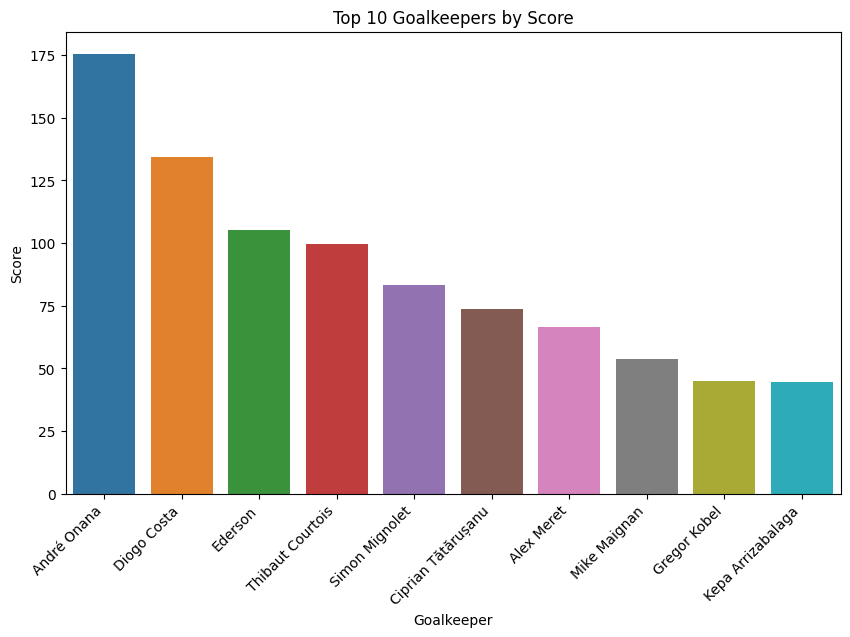

In [87]:
# Select top N goalkeepers
top_n = 10
top_goalkeepers = data3.head(top_n)

# Create a bar plot for the top N goalkeepers and their Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Score', data=top_goalkeepers)
plt.title(f'Top {top_n} Goalkeepers by Score')
plt.xlabel('Goalkeeper')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
# Creating a final DataFrame with selected columns
gkfin = data3[['Player', 'Position', 'Club', 'Score']].reset_index(drop=True)
gkfin

,Player,Position,Club,Score
0,André Onana,GK,Inter,175.543621
1,Diogo Costa,GK,Porto,134.242728
2,Ederson,GK,Manchester City,105.182818
3,Thibaut Courtois,GK,Real Madrid,99.683599
4,Simon Mignolet,GK,Club Brugge,83.260050
5,Ciprian Tătărușanu,GK,Milan,73.736595
6,Alex Meret,GK,Napoli,66.441131
7,Mike Maignan,GK,Milan,53.800705
8,Gregor Kobel,GK,Dortmund,45.005238
9,Kepa Arrizabalaga,GK,Chelsea,44.407858


In [30]:
# Displaying the best goalkeeper

print('The Best Goalkeeper from UCL 2022/2023 Season is : ')
print(gkfin.head(1)['Player'])

The Best Goalkeeper from UCL 2022/2023 Season is : 
0    André Onana
Name: Player, dtype: object
